In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from collections import Counter

In [32]:
import seaborn as sns
sns.set(style="whitegrid")

In [13]:
df = pd.read_csv("complete_movie.csv")
df.head()

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...


In [14]:
df = df.drop(columns=['Imdb Link', 'Poster'], axis=1)
df.head()

,imdbId,Title,IMDB Score,Genre
0,114709,Toy Story (1995),8.3,Animation|Adventure|Comedy
1,113497,Jumanji (1995),6.9,Action|Adventure|Family
2,113228,Grumpier Old Men (1995),6.6,Comedy|Romance
3,114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance
4,113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance


In [15]:
# check for null values
df.isnull().sum()

imdbId          0
Title           0
IMDB Score     15
Genre         116
dtype: int64

In [16]:
# drop null values
df = df.dropna()

In [17]:
# remove '|' from Genre column
df['Genre'] = df['Genre'].apply(lambda x: x.replace('|', ','))
df.head()

,imdbId,Title,IMDB Score,Genre
0,114709,Toy Story (1995),8.3,"Animation,Adventure,Comedy"
1,113497,Jumanji (1995),6.9,"Action,Adventure,Family"
2,113228,Grumpier Old Men (1995),6.6,"Comedy,Romance"
3,114885,Waiting to Exhale (1995),5.7,"Comedy,Drama,Romance"
4,113041,Father of the Bride Part II (1995),5.9,"Comedy,Family,Romance"


In [18]:
# extract year from title and add it to a new column, remove year from title
df['Year'] = df['Title'].apply(lambda x: x[-5:-1])
df['Title'] = df['Title'].apply(lambda x: x[:-7])
column_order = ['imdbId','Title', 'Year', 'IMDB Score', 'Genre']
df = df[column_order]
df.head()

,imdbId,Title,Year,IMDB Score,Genre
0,114709,Toy Story,1995,8.3,"Animation,Adventure,Comedy"
1,113497,Jumanji,1995,6.9,"Action,Adventure,Family"
2,113228,Grumpier Old Men,1995,6.6,"Comedy,Romance"
3,114885,Waiting to Exhale,1995,5.7,"Comedy,Drama,Romance"
4,113041,Father of the Bride Part II,1995,5.9,"Comedy,Family,Romance"


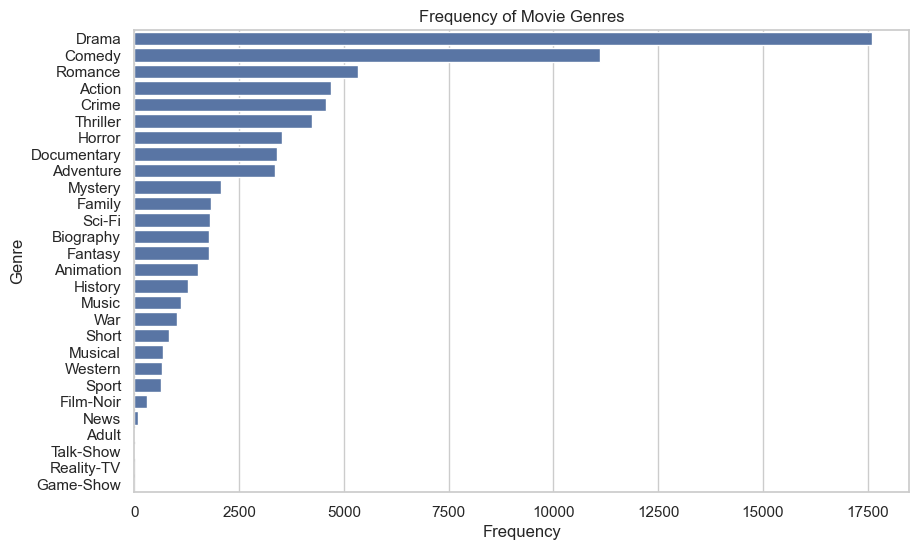

In [33]:
# Split the genres and flatten the list
all_genres = [genre for sublist in df['Genre'].str.split(',') for genre in sublist]

# Count the frequency of each genre
genre_counts = Counter(all_genres)

# Create a DataFrame from the genre counts
genre_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['Count']).sort_values('Count', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_df['Count'], y=genre_df.index)
plt.title('Frequency of Movie Genres')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.show()

In [36]:
# To remove the genres with a frequency of less than 1000 from the DataFrame, we need to re-calculate the genre counts
# and then filter the DataFrame so that it only contains movies where each of its genres has a frequency of 1000 or more.

# Recalculate genre counts on the original DataFrame
all_genres_original = [genre for sublist in df['Genre'].str.split(',') for genre in sublist]
genre_counts_original = Counter(all_genres_original)

# Identify genres with a frequency of 1000 or more
popular_genres = {genre: count for genre, count in genre_counts_original.items() if count >= 1000}

# Define a filtering function
def filter_by_genre_frequency(row):
    genres = row['Genre'].split(',')
    return all(genre in popular_genres for genre in genres)

# Apply the filter to the DataFrame
df_filtered_by_genre_frequency = df[df.apply(filter_by_genre_frequency, axis=1)]

,imdbId,Title,Year,IMDB Score,Genre
0,114709,Toy Story,1995,8.3,"Animation,Adventure,Comedy"
1,113497,Jumanji,1995,6.9,"Action,Adventure,Family"
2,113228,Grumpier Old Men,1995,6.6,"Comedy,Romance"
3,114885,Waiting to Exhale,1995,5.7,"Comedy,Drama,Romance"
4,113041,Father of the Bride Part II,1995,5.9,"Comedy,Family,Romance"


In [38]:
print(df_filtered_by_genre_frequency.shape)
print(df.shape)

(31713, 5)
(34871, 5)


In [34]:
def are_all_genres_frequent(genres):
    """Check if all the genres in the movie are frequent enough."""
    return all(genre in filtered_genres_set for genre in genres.split(','))

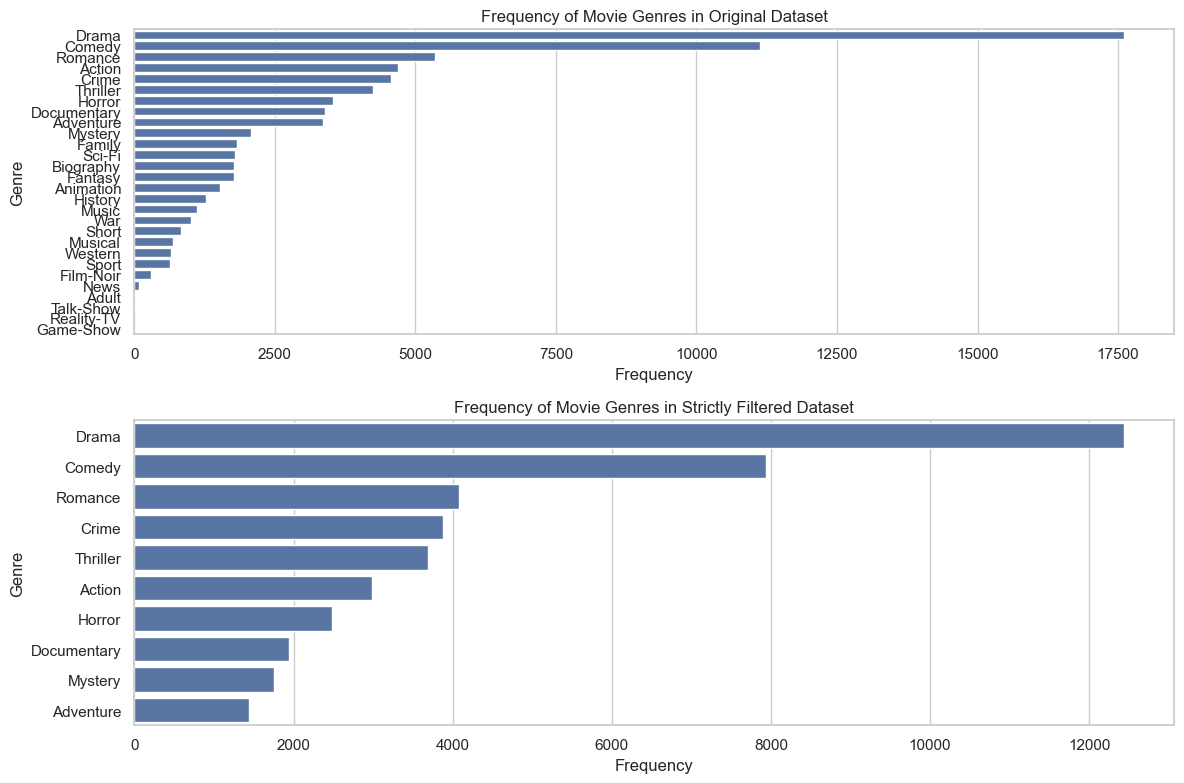

In [35]:
# Apply the updated filtering
df_strictly_filtered = df[df['Genre'].apply(are_all_genres_frequent)]

# Recount the frequency of each genre in the strictly filtered dataset
all_genres_strictly_filtered = [genre for sublist in df_strictly_filtered['Genre'].str.split(',') for genre in sublist]
genre_counts_strictly_filtered = Counter(all_genres_strictly_filtered)

# Convert to DataFrame for plotting
genre_df_strictly_filtered = pd.DataFrame.from_dict(genre_counts_strictly_filtered, orient='index', columns=['Count']).sort_values('Count', ascending=False)

# Plotting the strictly filtered data
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.barplot(x=genre_df['Count'], y=genre_df.index)
plt.title('Frequency of Movie Genres in Original Dataset')
plt.xlabel('Frequency')
plt.ylabel('Genre')

plt.subplot(2, 1, 2)
sns.barplot(x=genre_df_strictly_filtered['Count'], y=genre_df_strictly_filtered.index)
plt.title('Frequency of Movie Genres in Strictly Filtered Dataset')
plt.xlabel('Frequency')
plt.ylabel('Genre')

plt.tight_layout()
plt.show()

In [41]:
def plot_genre_proportions(df, genre1, genre2):
    # Ensure the genres are in the DataFrame columns
    if genre1 not in mlb.classes_ or genre2 not in mlb.classes_:
        raise ValueError("One or both genres not found in the dataset.")
    
    # Calculate the counts
    total_movies = len(df)
    genre1_count = df[genre1].sum()
    genre2_count = df[genre2].sum()
    both_genres_count = df[(df[genre1] == 1) & (df[genre2] == 1)].shape[0]
    
    # Calculate the proportions
    genre1_prop = genre1_count / total_movies
    genre2_prop = genre2_count / total_movies
    both_genres_prop = both_genres_count / total_movies
    
    # Data for pie chart
    labels = [f'Movies with Genre {genre1}', f'Movies with Genre {genre2}', f'Both {genre1} and {genre2}']
    sizes = [genre1_prop - both_genres_prop, genre2_prop - both_genres_prop, both_genres_prop]
    colors = ['gold', 'lightcoral', 'lightgreen']
    explode = (0.1, 0, 0.1)  # explode 1st and 3rd slices
    
    # Plot
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
    plt.title(f'Proportion of {genre1} and {genre2} in Movies')
    plt.show()

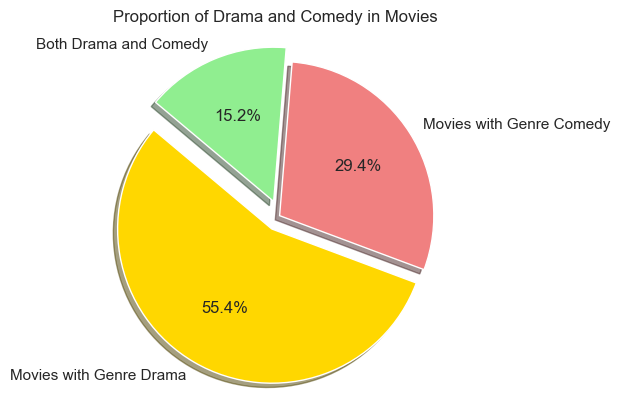

In [42]:
plot_genre_proportions(genre_binarized_df, 'Drama', 'Comedy')

In [43]:
genre_binarized_df.head()

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [44]:
# Reload the original DataFrame
df_original = pd.read_csv('complete_movie.csv')

# Drop null values
df_original = df_original.dropna()

# Replace '|' with ',' in the 'Genre' column
df_original['Genre'] = df_original['Genre'].apply(lambda x: x.replace('|', ','))

# Define the filtering function using the popular_genres set from the previous steps
def filter_popular_genres(row):
    genres = row['Genre'].split(',')
    return all(genre in popular_genres for genre in genres)

# Apply the filtering
final_df_with_all_columns = df_original[df_original.apply(filter_popular_genres, axis=1)]

# Display the first few rows of the final DataFrame with all columns
final_df_with_all_columns.head()

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,"Animation,Adventure,Comedy",https://images-na.ssl-images-amazon.com/images...
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,"Action,Adventure,Family",https://images-na.ssl-images-amazon.com/images...
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,"Comedy,Romance",https://images-na.ssl-images-amazon.com/images...
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,"Comedy,Drama,Romance",https://images-na.ssl-images-amazon.com/images...
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,"Comedy,Family,Romance",https://images-na.ssl-images-amazon.com/images...


In [45]:
final_df_with_all_columns.shape

(31713, 6)

In [46]:
# SAVE THE FINAL DATAFRAME TO A CSV FILE
final_df_with_all_columns.to_csv('Movies_dataset_promax.csv', index=False)